In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
data = sm.datasets.fair.load_pandas().data



In [2]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [4]:
data.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [5]:
import seaborn as sns

In [6]:
data['affair'] = (data.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe")
X = X.rename(columns = 
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [7]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [8]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [9]:
X.shape

(6366, 17)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
Intercept        6366 non-null float64
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
dtypes: float64(17)
memory usage: 895.2 KB


In [11]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [12]:
X.dtypes

Intercept        float64
occ_2            float64
occ_3            float64
occ_4            float64
occ_5            float64
occ_6            float64
occ_husb_2       float64
occ_husb_3       float64
occ_husb_4       float64
occ_husb_5       float64
occ_husb_6       float64
rate_marriage    float64
age              float64
yrs_married      float64
children         float64
religious        float64
educ             float64
dtype: object

In [13]:
X.Intercept.value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [14]:
X.drop('Intercept',axis=1,inplace=True)

In [15]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


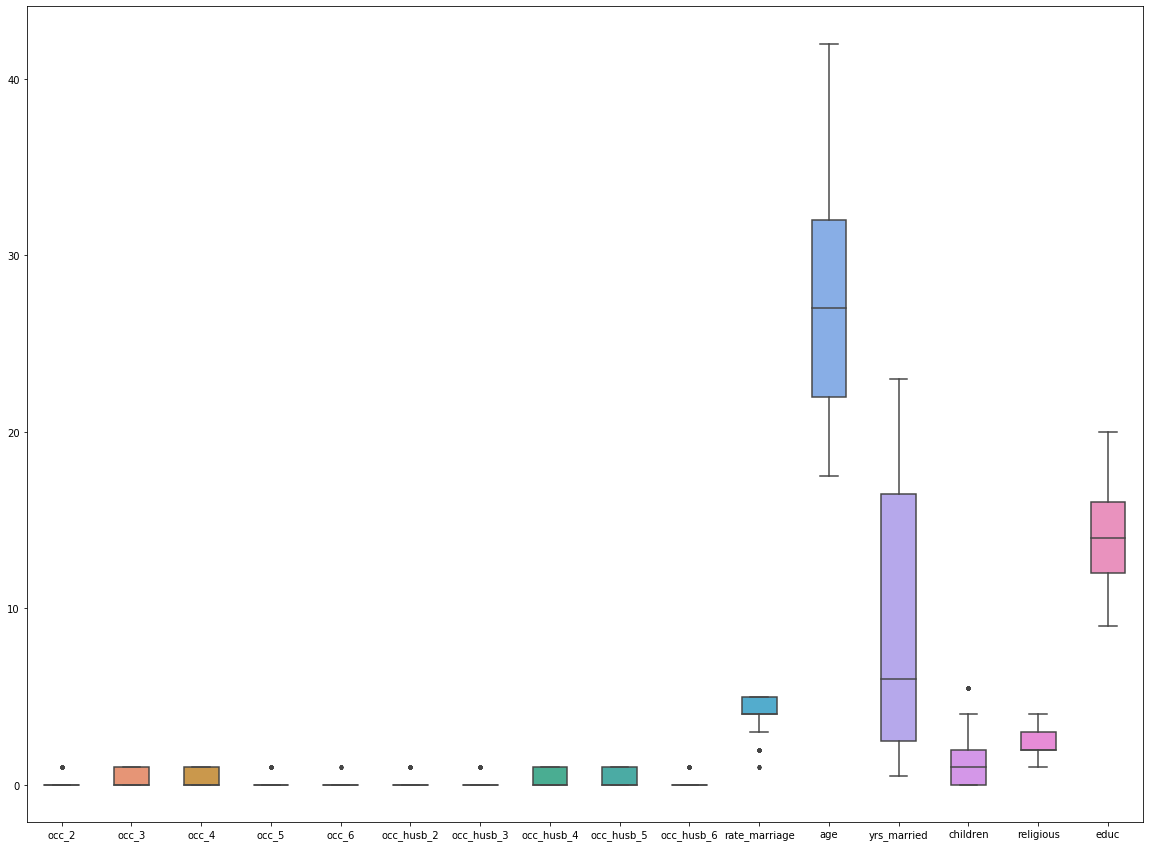

In [16]:

fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)


In [17]:
contingency_table1 = pd.crosstab(data['occupation'],data['affair'])
contingency_table1

affair,0,1
occupation,,
1.0,34,7
2.0,607,252
3.0,1818,965
4.0,1354,480
5.0,431,309
6.0,69,40


In [18]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency_table1)

(77.75112930360406,
 2.477892436591016e-15,
 5,
 array([[  27.77772542,   13.22227458],
        [ 581.97722275,  277.02277725],
        [1885.49780082,  897.50219918],
        [1242.54508325,  591.45491675],
        [ 501.35406849,  238.64593151],
        [  73.84809928,   35.15190072]]))

In [19]:
?chi2_contingency

In [20]:
contingency_table2 = pd.crosstab(data['occupation_husb'],data['affair'])
contingency_table2

affair,0,1
occupation_husb,,
1.0,181,48
2.0,882,426
3.0,317,173
4.0,1391,639
5.0,1177,602
6.0,365,165


In [21]:

chi2_contingency(contingency_table2)

(18.426805769236335,
 0.0024564278771048156,
 5,
 array([[ 155.14875903,   73.85124097],
        [ 886.17719133,  421.82280867],
        [ 331.977694  ,  158.022306  ],
        [1375.33616085,  654.66383915],
        [1205.28228087,  573.71771913],
        [ 359.07791392,  170.92208608]]))

In [22]:
contingency_table3 = pd.crosstab(data['educ'],data['affair'])
contingency_table3

affair,0,1
educ,,
9.0,27,21
12.0,1361,723
14.0,1469,808
16.0,844,273
17.0,370,140
20.0,242,88


In [23]:
chi2_contingency(contingency_table3)

(60.76922032803681,
 8.42818425572863e-12,
 5,
 array([[  32.5202639 ,   15.4797361 ],
        [1411.92145774,  672.07854226],
        [1542.68001885,  734.31998115],
        [ 756.77364122,  360.22635878],
        [ 345.52780396,  164.47219604],
        [ 223.57681433,  106.42318567]]))

In [24]:
contingency_table4 = pd.crosstab(data['religious'],data['affair'])
contingency_table4

affair,0,1
religious,,
1.0,613,408
2.0,1448,819
3.0,1715,707
4.0,537,119


In [25]:
chi2_contingency(contingency_table4)

(113.52785751392398,
 1.909881357296901e-24,
 3,
 array([[ 691.73311342,  329.26688658],
        [1535.90496387,  731.09503613],
        [1640.91831605,  781.08168395],
        [ 444.44360666,  211.55639334]]))

In [26]:
contingency_table5 = pd.crosstab(data['children'],data['affair'])
contingency_table5

affair,0,1
children,,
0.0,1912,502
1.0,747,412
2.0,873,608
3.0,460,321
4.0,197,131
5.5,124,79


In [27]:
chi2_contingency(contingency_table5)

(244.27357244863842,
 9.303019680004709e-51,
 5,
 array([[1635.49827207,  778.50172793],
        [ 785.22887213,  373.77112787],
        [1003.38564248,  477.61435752],
        [ 529.13179391,  251.86820609],
        [ 222.22180333,  105.77819667],
        [ 137.53361609,   65.46638391]]))

In [28]:
contingency_table6 = pd.crosstab(data['rate_marriage'],data['affair'])
contingency_table6

affair,0,1
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


In [29]:
chi2_contingency(contingency_table6)

(718.8381984755297,
 2.9045329481179437e-154,
 4,
 array([[  67.0730443 ,   31.9269557 ],
        [ 235.77191329,  112.22808671],
        [ 672.76295947,  320.23704053],
        [1518.96732642,  723.03267358],
        [1818.42475652,  865.57524348]]))

In [30]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(data['age'], data['affair'])
pval

0.0

In [31]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(data['yrs_married'], data['affair'])
pval

0.0

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [33]:
X_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.28115287],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [35]:
vif

,vif,Features
0,19.340780,occ_2
1,39.335618,occ_3
2,32.931910,occ_4
3,17.057165,occ_5
4,3.697959,occ_6
5,5.566292,occ_husb_2
6,2.991070,occ_husb_3
7,6.930281,occ_husb_4
8,6.577077,occ_husb_5
9,3.185266,occ_husb_6


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3, random_state = 355)

In [37]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\Lenovo\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = log_reg.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7188481675392671

In [40]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1156,  132],
       [ 405,  217]], dtype=int64)

In [41]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [42]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7188481675392671

In [43]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8975155279503105

In [44]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.740550928891736

In [45]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8115128115128114

In [46]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.6231950630105251

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

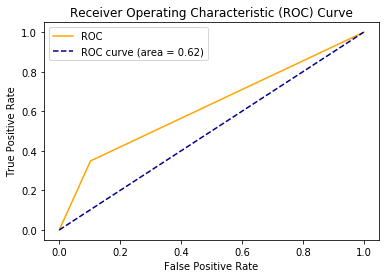

In [48]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

---------------------------------------------------------------------------------
Removing the outliers and rebuilding the model

In [49]:
y1 = pd.Series(y)
y1.value_counts()

0.0    4313
1.0    2053
dtype: int64

In [50]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [51]:
X1 = X.copy()

In [52]:
data1 = pd.concat([X1,y1.rename('y1')],axis=1)

In [53]:
data1.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,y1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [54]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data1))
print(z)

[[2.531984   0.88131913 0.63614294 ... 0.65334148 1.28115287 1.44942335]
 [0.3949472  1.13466276 0.63614294 ... 1.62378518 0.09636416 1.44942335]
 [0.3949472  1.13466276 0.63614294 ... 1.62378518 0.82198052 1.44942335]
 ...
 [0.3949472  1.13466276 0.63614294 ... 0.48522185 0.09636416 0.68992955]
 [0.3949472  1.13466276 0.63614294 ... 0.65334148 0.09636416 0.68992955]
 [2.531984   0.88131913 0.63614294 ... 0.48522185 0.82198052 0.68992955]]


In [55]:
threshold = 3
print(np.where(z > 3))

(array([   7,    8,   12, ..., 6350, 6360, 6361], dtype=int64), array([6, 6, 6, ..., 9, 6, 6], dtype=int64))


In [56]:
data1 = data1[(z < 3).all(axis=1)]

In [57]:
data1.shape

(5212, 17)

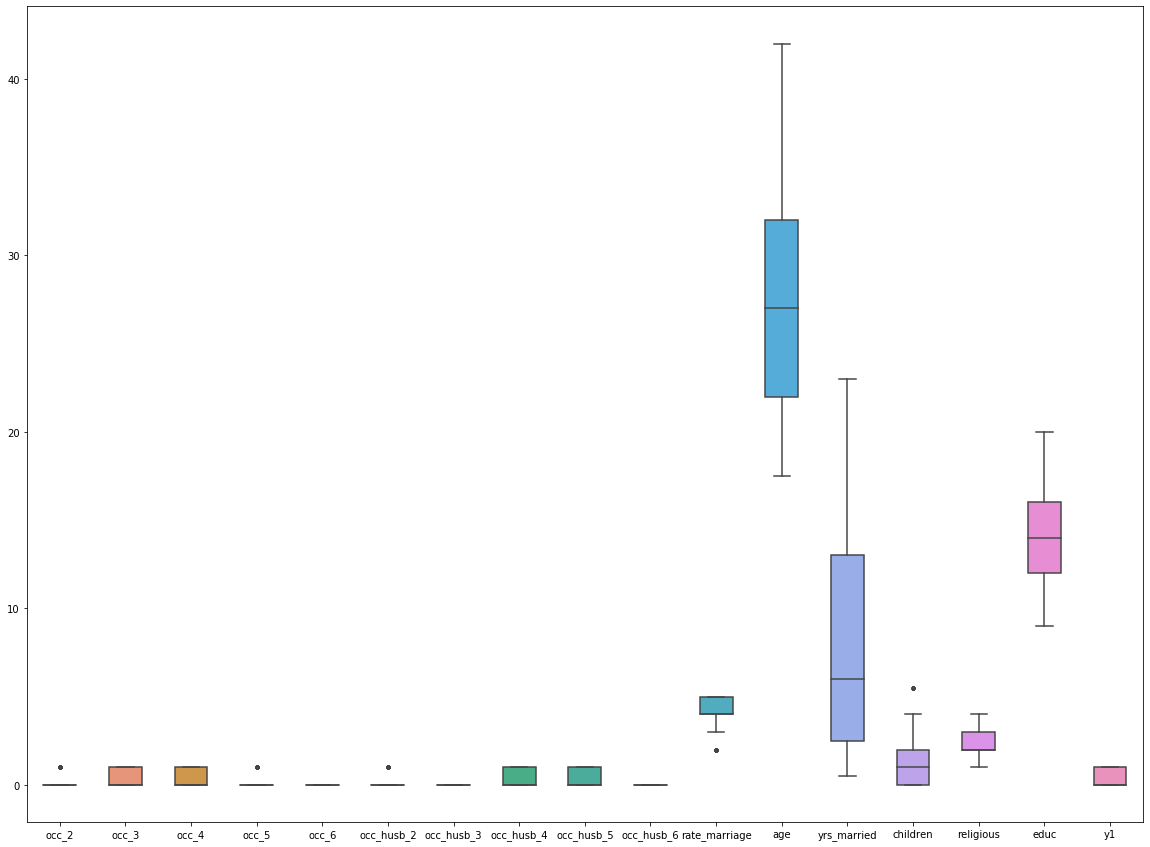

In [58]:

fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data1, width= 0.5,ax=ax,  fliersize=3)

In [59]:
X1.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [60]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X1_scaled = scalar.fit_transform(X1)

In [123]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1_scaled,y1, test_size= 0.3, random_state = 220)

In [124]:
log_reg = LogisticRegression()

log_reg.fit(x1_train,y1_train)

C:\Users\Lenovo\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
y1_pred = log_reg.predict(x1_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y1_test,y1_pred)
accuracy

0.7209424083769633

In [127]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y1_test,y1_pred)
conf_mat

array([[1149,  139],
       [ 394,  228]], dtype=int64)

In [128]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [129]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8920807453416149

In [130]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.744653272845107

In [131]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8117273048392794

In [132]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y1_test, y1_pred)
auc

0.6293201154360807

--------------------------------
Removing the features having high vif values and rebuilding the model

In [71]:
data2 = data1.copy()
y2 = y1
X2 = X1

In [72]:
X2.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [73]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X2_scaled = scalar.fit_transform(X2)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X2_scaled,i) for i in range(X2_scaled.shape[1])]
vif["Features"] = X2.columns

In [75]:
vif

,vif,Features
0,19.340780,occ_2
1,39.335618,occ_3
2,32.931910,occ_4
3,17.057165,occ_5
4,3.697959,occ_6
5,5.566292,occ_husb_2
6,2.991070,occ_husb_3
7,6.930281,occ_husb_4
8,6.577077,occ_husb_5
9,3.185266,occ_husb_6


In [76]:
X2.drop(['occ_2','occ_3','occ_4','occ_5'],axis=1,inplace=True)

In [77]:
X2.head()

,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [78]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X2_scaled = scalar.fit_transform(X2)

In [153]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2_scaled,y2, test_size= 0.3, random_state = 42)

In [154]:
log_reg = LogisticRegression()

log_reg.fit(x2_train,y2_train)

C:\Users\Lenovo\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
y2_pred = log_reg.predict(x2_test)

In [156]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2_test,y2_pred)
accuracy

0.7178010471204188

In [157]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y2_test,y2_pred)
conf_mat

array([[1136,  139],
       [ 400,  235]], dtype=int64)

In [158]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [159]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8909803921568628

In [160]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7395833333333334

In [161]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8082532906438991

In [162]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_test, y2_pred)
auc

0.6305295661571716